In [1]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import re

import multiprocessing

# logging config
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
# read data file: contains all text data concatenated into a single file
with open('../data/AllCombined.txt', 'r', encoding='utf-8') as f:
    contents = f.read()

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yjiah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yjiah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# preprocessing:
# split text into sentences using fullstop
# tokenize the split sentences into words
# remove stopwords
# remove punctuation
# lemmatization

# split text into sentences by fullstop and lowercase everything
sentences_lst = [content.strip().lower() for content in contents.split('.')]

# remove punctuation
sentences_lst_removed_punc = [re.sub(r'[^\w\s]', '', sentence) for sentence in sentences_lst]

# tokenize the split sentences into words
tokenized_sentences = [sentence.split() for sentence in sentences_lst_removed_punc]

# # stopword removal
# stop_words = set(stopwords.words('english'))
# filtered_tokenized_sentences = [[word for word in sentence if word not in stop_words] for sentence in tokenized_sentences]

In [5]:
# train the model

model = Word2Vec(
    tokenized_sentences,
    vector_size=300,
    window=5,
    min_count=1,
    sg=1,
    epochs=10,
    negative=10,
    workers=12
)

2025-08-16 16:51:15,445 : INFO : collecting all words and their counts
2025-08-16 16:51:15,446 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-08-16 16:51:15,466 : INFO : PROGRESS: at sentence #10000, processed 146083 words, keeping 13505 word types
2025-08-16 16:51:15,480 : INFO : PROGRESS: at sentence #20000, processed 296719 words, keeping 19981 word types
2025-08-16 16:51:15,513 : INFO : PROGRESS: at sentence #30000, processed 441514 words, keeping 26041 word types
2025-08-16 16:51:15,537 : INFO : PROGRESS: at sentence #40000, processed 589810 words, keeping 31414 word types
2025-08-16 16:51:15,561 : INFO : PROGRESS: at sentence #50000, processed 739725 words, keeping 37214 word types
2025-08-16 16:51:15,581 : INFO : PROGRESS: at sentence #60000, processed 885995 words, keeping 41933 word types
2025-08-16 16:51:15,610 : INFO : PROGRESS: at sentence #70000, processed 1033539 words, keeping 46067 word types
2025-08-16 16:51:15,630 : INFO : PROGRESS: at

In [6]:
# save the trained model
model.save("./models/word2vec_skipgram_300.model")

2025-08-16 17:32:44,191 : INFO : Word2Vec lifecycle event {'fname_or_handle': './models/word2vec_skipgram_300.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2025-08-16T17:32:44.191022', 'gensim': '4.3.3', 'python': '3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'saving'}
2025-08-16 17:32:44,194 : INFO : storing np array 'vectors' to ./models/word2vec_skipgram_300.model.wv.vectors.npy
2025-08-16 17:32:45,846 : INFO : storing np array 'syn1neg' to ./models/word2vec_skipgram_300.model.syn1neg.npy
2025-08-16 17:32:47,396 : INFO : not storing attribute cum_table
2025-08-16 17:32:47,858 : INFO : saved ./models/word2vec_skipgram_300.model


## Analysis

### Nearest Neighbours for selected words

In [7]:
selected_words = [
    'cow',
    'fight',
    'chemistry',
    'month',
    'energy'
]

for word in selected_words:
    print(f'Word is: {word}')
    print(model.wv.most_similar(word))
    print("*" * 30)

Word is: cow
[('goat', 0.589715301990509), ('cows', 0.582561194896698), ('heifer', 0.5570659637451172), ('unpasteurized', 0.545629620552063), ('clarabelle', 0.5318142175674438), ('sæhrímnir', 0.5299749374389648), ('copyonwrite', 0.5287436246871948), ('stellers', 0.5278357863426208), ('pig', 0.5275891423225403), ('aegagrus', 0.5225337147712708)]
******************************
Word is: fight
[('fighting', 0.7374371886253357), ('fights', 0.6793599724769592), ('fought', 0.6440064907073975), ('fending', 0.627911388874054), ('singlehanded', 0.6137930750846863), ('brawls', 0.6124379634857178), ('defend', 0.6124152541160583), ('incapacitate', 0.6089490652084351), ('fend', 0.608856737613678), ('subdue', 0.6066573858261108)]
******************************
Word is: chemistry
[('physics', 0.7763367295265198), ('bioorganic', 0.667092502117157), ('biochemistry', 0.6582741141319275), ('supramolecular', 0.6544395089149475), ('bioinorganic', 0.6441304087638855), ('physiology', 0.6438828706741333), ('bi

Similar words are mostly reasonable

### Visualization of PCA embedding space

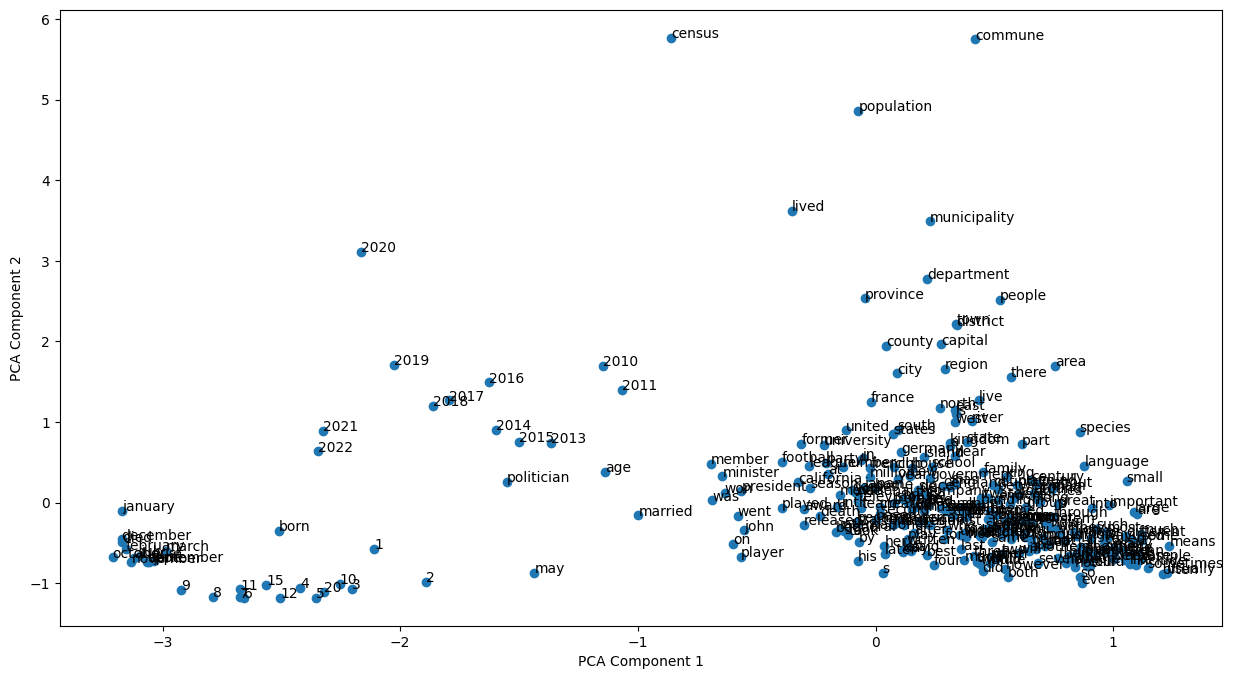

In [12]:
words = list(model.wv.index_to_key[0:300])
embeddings = model.wv[words]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(15, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o')

for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=10)


plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

We can see that the months are clustered together, years are also clustered together